In [83]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

In [84]:
from sklearn.preprocessing import LabelEncoder , StandardScaler
from datasist.structdata import detect_outliers
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

In [85]:
warnings.filterwarnings('ignore')

In [86]:
%matplotlib inline 

In [87]:
sns.set_theme(context = 'notebook' , style = 'ticks' , palette = 'autumn' , font_scale = 1.1 , 
             rc = {'figure.figsize' : (8,4)})

In [88]:
df = pd.read_csv('Advertising_Data_Set.csv')
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [89]:
df.duplicated().sum()

0

In [90]:
df.isnull().mean()*100

TV              0.218723
Radio           0.087489
Social Media    0.131234
Influencer      0.000000
Sales           0.131234
dtype: float64

In [91]:
df.dropna(axis = 0 , inplace = True)

In [92]:
df.reset_index(inplace = True , drop = True)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4546 entries, 0 to 4545
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4546 non-null   float64
 1   Radio         4546 non-null   float64
 2   Social Media  4546 non-null   float64
 3   Influencer    4546 non-null   object 
 4   Sales         4546 non-null   float64
dtypes: float64(4), object(1)
memory usage: 177.7+ KB


In [94]:
df['Influencer'].value_counts().to_frame().T

,Mega,Micro,Nano,Macro
Influencer,1152,1148,1134,1112


<AxesSubplot:xlabel='Influencer', ylabel='count'>

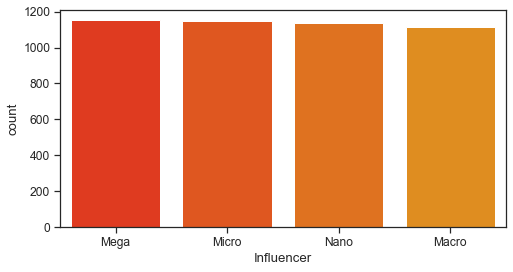

In [95]:
sns.countplot(df['Influencer'])

In [96]:
mapper = {"Nano" : 1 , "Micro":2 , "Macro" : 3 , "Mega" : 4}

In [97]:
df['Influencer'] = df['Influencer'].map(mapper)

<AxesSubplot:xlabel='TV'>

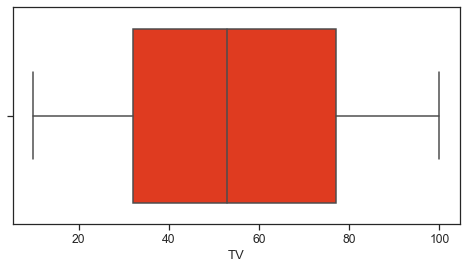

In [98]:
sns.boxplot(df['TV'])

<AxesSubplot:xlabel='TV', ylabel='Density'>

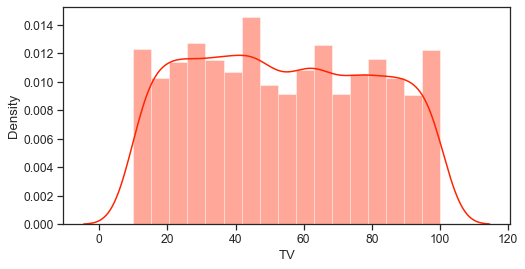

In [99]:
sns.distplot(df['TV'])

<AxesSubplot:xlabel='Radio'>

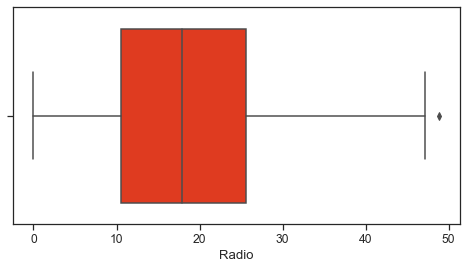

In [100]:
sns.boxplot(df['Radio'])

<AxesSubplot:xlabel='Radio', ylabel='Density'>

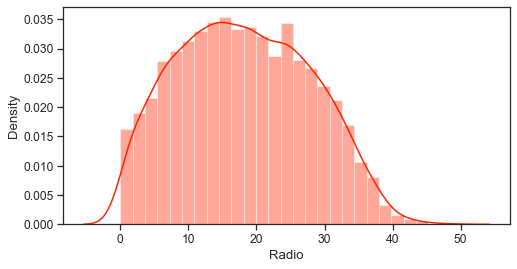

In [101]:
sns.distplot(df['Radio'])

<AxesSubplot:xlabel='Social Media'>

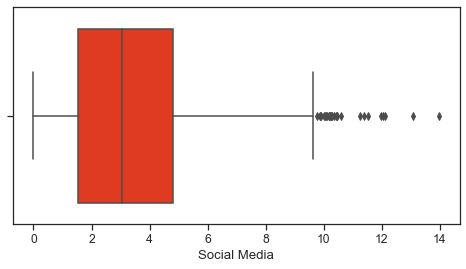

In [102]:
sns.boxplot(df['Social Media'])

<AxesSubplot:xlabel='Social Media', ylabel='Density'>

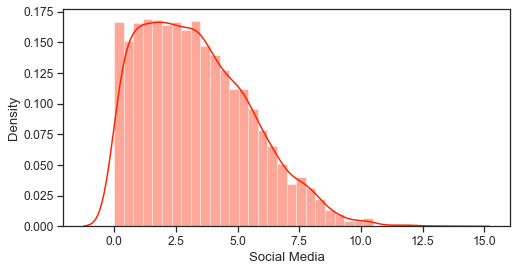

In [103]:
sns.distplot(df['Social Media'])

In [104]:
len(detect_outliers(df , 0 , ['Radio' , 'Social Media']))

29

In [105]:
df.drop(detect_outliers(df , 0 , ['Radio' , 'Social Media']) , axis = 0 , inplace = True)

In [106]:
df.reset_index(inplace = True , drop = True)

In [107]:
df

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,4,54.732757
1,13.0,9.237765,2.409567,4,46.677897
2,41.0,15.886446,2.913410,4,150.177829
3,83.0,30.020028,6.922304,4,298.246340
4,15.0,8.437408,1.405998,2,56.594181
...,...,...,...,...,...
4512,26.0,4.472360,0.717090,2,94.685866
4513,71.0,20.610685,6.545573,1,249.101915
4514,44.0,19.800072,5.096192,2,163.631457
4515,71.0,17.534640,1.940873,3,253.610411


<AxesSubplot:xlabel='TV', ylabel='Sales'>

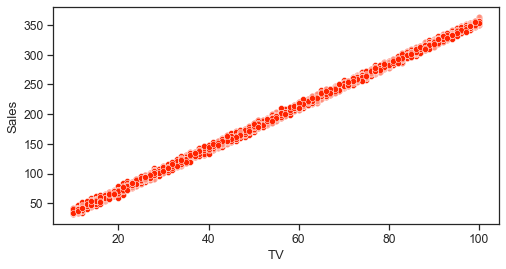

In [108]:
sns.scatterplot(data = df , x = 'TV' , y = 'Sales')

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

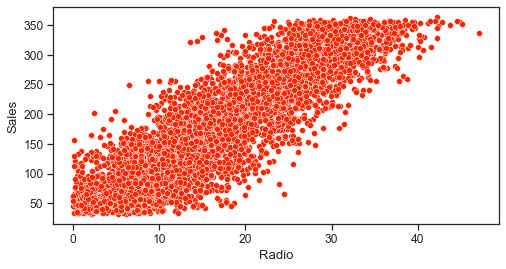

In [109]:
sns.scatterplot(data = df , x = 'Radio' , y = 'Sales')

<AxesSubplot:xlabel='Social Media', ylabel='Sales'>

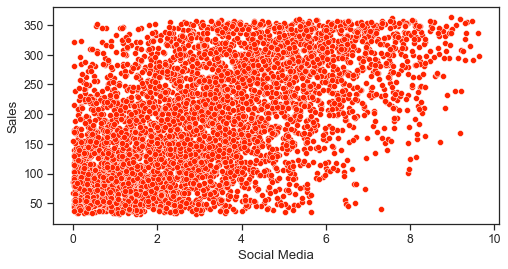

In [110]:
sns.scatterplot(data = df , x = 'Social Media' , y = 'Sales')

<AxesSubplot:>

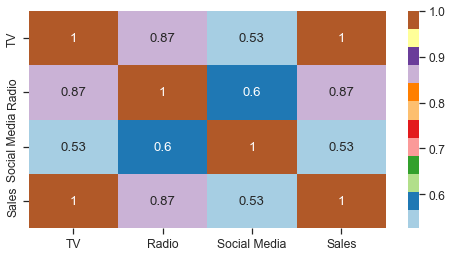

In [111]:
sns.heatmap(df[col_to_scale].corr() , cmap='Paired' , annot = True)

In [112]:
x = df.drop(['Sales'] , axis = 1)

In [113]:
y = df['Sales']

In [114]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 
                                                       , random_state = 7) 

In [115]:
sclr = StandardScaler()

In [116]:
col_to_scale = ['TV','Radio','Social Media']

In [117]:
x_train[col_to_scale] = sclr.fit_transform(x_train[col_to_scale])

In [118]:
x_test[col_to_scale] = sclr.transform(x_test[col_to_scale])

In [119]:
model = LinearRegression()

In [120]:
model.fit(x_train , y_train)

LinearRegression()

In [121]:
y_pred = model.predict(x_test)

In [122]:
mean_squared_error(y_true = y_test , y_pred = y_pred , squared = False)

2.9806065366687124

In [123]:
r2_score(y_true = y_test , y_pred = y_pred)

0.9989185504142948